# Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto **"Churn de Clientes"**. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.


#📌 Extracción

In [46]:
import pandas as pd
import requests

# Cargar los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df_telecomx = pd.DataFrame(data)
df_telecomx.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [47]:
df_telecomx.sample(5)

,customerID,Churn,customer,phone,internet,account
3931,5373-SFODM,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3478,4815-YOSUK,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
4517,6194-HBGQN,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
6890,9500-IWPXQ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
5867,8022-BECSI,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."


#🔧 Transformación

## Conociendo el conjunto de datos

In [48]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [49]:
df_telecomx.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## Normalizando Archivo JSON

In [50]:
# Normalizar las columnas
from pandas import json_normalize

df_telecomx_normalized = json_normalize(data)

df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [51]:
df_telecomx_normalized.tail(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


## Validar

### 1.Valores unicos

In [52]:
# Validar valores únicos por columna
for col in df_telecomx_normalized.columns: # valores únicos de las columnas:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: ['No' 'Yes' '']
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: ['Yes' 'No']
-------------------------------

### 2.Números duplicados

In [53]:
# Validar si hay numeros duplicado
duplicados = df_telecomx_normalized.duplicated()
print(duplicados.sum())

0


### 3.Valores nulos

In [54]:
# Validar si hay valores nulos
valores_nulos = df_telecomx_normalized.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


### 4.Valores en blanco o vacios

In [55]:
# Validar si hay valores en blanco o vacios
valores_vacios = df_telecomx_normalized.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

Churn                    224
account.Charges.Total     11
dtype: int64


In [56]:
# 224 registros tienen el campo 'Churn' con un string vacio y 11 regisros en la columna account.Charges.Total
df_telecomx_normalized[df_telecomx_normalized['Churn'].astype(str).str.strip()== '']
df_telecomx_normalized[df_telecomx_normalized['account.Charges.Total'].astype(str).str.strip()== '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


#####1.Campo Churn valores con string vacio se asigna -1

In [57]:
# Campo Churn : asigno -1 porque es desconocido el porque el cliente dejo o no la empresa.
import numpy as np

# Reemplazar las cadenas vacías en la columna 'Churn' con -1
df_telecomx_normalized['Churn'] = df_telecomx_normalized['Churn'].astype(str).str.strip().replace('', '-1')

In [58]:
# Valido que ya quedao el campo sin valores con string vacio se cambiaron a -1
display(pd.unique(df_telecomx_normalized['Churn']))

array(['No', 'Yes', '-1'], dtype=object)

In [59]:
df_telecomx_normalized[df_telecomx_normalized['Churn'].astype(str).str.strip()== '-1']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,-1,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,-1,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,-1,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,-1,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,-1,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,-1,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,-1,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,-1,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,-1,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


##### 2.Campo account.Charges.Total valores con string vacio se asigna 0

In [60]:
# Campo account.Charges.Total : asigno 0 porque es desconocido el valor de pago porque puede ser un cliente nuevo que no ha generado la primera factura de pago.
# Reemplazar las cadenas vacías en la columna 'account.Charges.Total' con 0
df_telecomx_normalized['account.Charges.Total'] = df_telecomx_normalized['account.Charges.Total'].astype(str).str.strip().replace('', '0')

In [61]:
df_telecomx_normalized[df_telecomx_normalized['account.Charges.Total'].astype(str).str.strip()== '0']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0


In [62]:
df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### 5.Tipos de datos

In [63]:
# Validar valores únicos ppor columna
for col in df_telecomx_normalized.columns: # valores únicos de las columnas:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: ['No' 'Yes' '-1']
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: ['Yes' 'No']
-----------------------------

In [64]:
df_telecomx_normalized.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


#### Campo account.Charges.Total de object a float

In [65]:
# Convertir la columna account.Charges.Total a tipo float
df_telecomx_normalized['account.Charges.Total'] = df_telecomx_normalized['account.Charges.Total'].astype(np.float64)
display(df_telecomx_normalized.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [66]:
df_telecomx_normalized['account.Charges.Total'].dtypes

dtype('float64')

#### Campos object , con valores Yes asignar 1, No asignar 0, y si hay un valor diferente asignar -1.

In [67]:
columns_yes_no = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in columns_yes_no:
    # Versión eficiente para otras columnas
    df_telecomx_normalized[col] = [1 if x == 'Yes' else (0 if x == 'No' else -1) for x in df_telecomx_normalized[col]]
    # Convertir la columna con unicos valores Yes / No a Booleana
    #if df_telecomx_normalized[col].nunique() == 2:
    #  df_telecomx_normalized[col] = df_telecomx_normalized[col].astype(bool)
    #else:  # Convertir la columna con unicos valores Yes / No / Otro  a integer
    df_telecomx_normalized[col] = df_telecomx_normalized[col].astype(int)


# Verificación
for col in columns_yes_no:
    print(f"{col}: {df_telecomx_normalized[col].unique()}")

Churn: [ 0  1 -1]
customer.Partner: [1 0]
customer.Dependents: [1 0]
phone.PhoneService: [1 0]
phone.MultipleLines: [ 0  1 -1]
internet.OnlineSecurity: [ 0  1 -1]
internet.OnlineBackup: [ 1  0 -1]
internet.DeviceProtection: [ 0  1 -1]
internet.TechSupport: [ 1  0 -1]
internet.StreamingTV: [ 1  0 -1]
internet.StreamingMovies: [ 0  1 -1]
account.PaperlessBilling: [1 0]


In [68]:
df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   int64  
 13  internet.TechSupport       7267 non-null   int64

Relación cambio de tipo de dato objetc a int, boolean o float

In [69]:
# Validar valores únicos por columna
for col in df_telecomx_normalized.columns: # valores únicos de las columnas:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: [ 0  1 -1]
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: [1 0]
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: [1 0]
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: [1 0]
---------------------------------------------------------

## Manejo inconsistentes

## Estandarización

### Renombrar columnas

In [70]:
df_telecomx_normalized.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelacion",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Adulto_Mayor",
    "customer.Partner": "Tiene_Pareja",
    "customer.Dependents": "Tiene_Dependientes",
    "customer.tenure": "Meses_Contrato",
    "phone.PhoneService": "Suscripcion_Servicio_Telefono",
    "phone.MultipleLines": "Suscripcion_Multiples_Lineas",
    "internet.InternetService": "Suscripcion_Servicio_Internet",
    "internet.OnlineSecurity": "Suscripcion_Seguridad_En_Linea",
    "internet.OnlineBackup": "Suscripcion_Respaldo_En_Linea",
    "internet.DeviceProtection": "Suscripcion_Proteccion_Dispositivo",
    "internet.TechSupport": "Suscripcion_Soporte_Técnico",
    "internet.StreamingTV": "Suscripcion_TV_Streaming",
    "internet.StreamingMovies": "Suscripcion_Películas_Streaming",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Factura_Electronica",
    "account.PaymentMethod": "Metodo_Pago",
    "account.Charges.Monthly": "Factura_Mensual",
    "account.Charges.Total": "Cargos_Totales"
}, inplace=True)

In [71]:
df_telecomx_normalized.head()

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40


In [72]:
df_telecomx_normalized.dtypes

,0
ID_Cliente,object
Cancelacion,int64
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,int64
Tiene_Dependientes,int64
Meses_Contrato,int64
Suscripcion_Servicio_Telefono,int64
Suscripcion_Multiples_Lineas,int64
Suscripcion_Servicio_Internet,object


### Agregar columna cuentas diaria

In [73]:
df_telecomx_normalized['Cuentas_diarias']=round(df_telecomx_normalized['Factura_Mensual']/30,1)

In [74]:
df_telecomx_normalized['Cuentas_diarias'].dtype

dtype('float64')

#📊 3-Análisis Exploratorio de datos (EDA)

##Analisis descriptivo

###Datos numéricos

In [75]:
df_telecomx_normalized.describe()

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Factura_Electronica,Factura_Mensual,Cargos_Totales,Cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.226366,0.162653,0.484106,0.300124,32.346498,0.902711,0.324481,0.068391,0.127013,0.125224,0.071969,0.166369,0.169946,0.593230,64.720098,2277.182035,2.158745
std,0.486627,0.369074,0.499782,0.458343,24.571773,0.296371,0.643295,0.706329,0.738968,0.738062,0.708503,0.757553,0.759119,0.491265,30.129572,2268.648587,1.002283
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.000000


Se observa que hay 7267 clientes

###Datos texto

In [76]:
datos_texto=df_telecomx_normalized[['Genero','Suscripcion_Servicio_Internet','Tipo_Contrato','Metodo_Pago']]
datos_texto.head(3)

,Genero,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago
0,Female,DSL,One year,Mailed check
1,Male,DSL,Month-to-month,Mailed check
2,Male,Fiber optic,Month-to-month,Electronic check


In [77]:
datos_texto.describe()

,Genero,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago
count,7267,7267,7267,7267
unique,2,3,3,4
top,Male,Fiber optic,Month-to-month,Electronic check
freq,3675,3198,4005,2445


##Distribución de evasión (Activos / De baja) - Gráficos

Distribución de la variable "churn" (evasión) entre los clientes. Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

###1. Distribución de evasión general

In [78]:
cancelacon_general = df_telecomx_normalized['Cancelacion'].value_counts()
cancelacon_general_porcentaje = df_telecomx_normalized['Cancelacion'].value_counts(normalize=True) * 100
tasa_cancelacion_general = pd.concat([cancelacon_general, cancelacon_general_porcentaje], axis=1)
tasa_cancelacion_general.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']
display(tasa_cancelacion_general)

,Frecuencia Absoluta,Frecuencia Relativa (%)
Cancelacion,,
0,5174,71.198569
1,1869,25.719004
-1,224,3.082427


In [79]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df_telecomx_normalized, x='Cancelacion', nbins=3, title='Histograma Cancelacion', text_auto=True,
                   color='Cancelacion',
                   color_discrete_map={0: 'blue', 1: 'red', -1: 'gray'}) # Asignar colores: 0 (No) a azul, 1 (Sí) a rojo, -1 (Desconocido) a gris
fig.update_layout(title=dict(text='<b>Histograma Cancelacion</b>', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'Activos', 'De Baja'])

# Actualizar etiquetas de leyenda
fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'Activos').replace('1', 'De Baja').replace("-1", 'No definidos')))

fig.show()

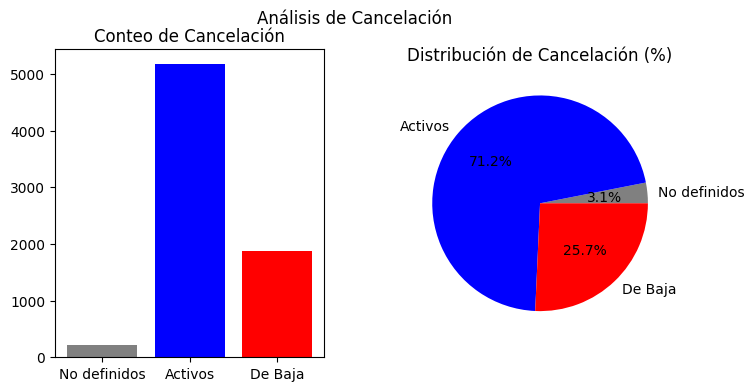

In [80]:
import matplotlib.pyplot as plt
import pandas as pd # Importar pandas
import plotly.express as px

# Obtener el conteo de cada categoría de cancelación
cancelacion_counts = df_telecomx_normalized['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Mapear valores numéricos a etiquetas de texto para graficar
cancellation_labels = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_labels)


# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Añadir un título general para los subplots
fig.suptitle('Análisis de Cancelación')

# Añadir el gráfico de barras para los conteos de cancelación al primer subplot
# Ordenar por el valor numérico para asegurar un orden consistente
cancelacion_counts = cancelacion_counts.sort_values('Cancelacion')
axs[0].bar(cancelacion_counts['Cancelacion_Text'], cancelacion_counts['Count'], color=['gray', 'blue', 'red']) # Usar colores apropiados
axs[0].set_title('Conteo de Cancelación') # Título cambiado para reflejar el gráfico de barras de conteos



# Añadir un gráfico de pastel para la distribución de cancelación al segundo subplot
axs[1].pie(cancelacion_counts['Count'], labels=cancelacion_counts['Cancelacion_Text'], autopct='%1.1f%%', colors=['gray', 'blue', 'red']) # Usar conteos y etiquetas para el gráfico de pastel
axs[1].set_title('Distribución de Cancelación (%)') # Título cambiado para mayor claridad

# Eliminar etiquetas de eje que no aplican a estos gráficos
# for ax in axs.flat:
#     ax.set_xlabel('Mes')
#     ax.set_ylabel('Número de ventas')

# Mostrar la figura
plt.show()

In [81]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots: 1 fila, 2 columnas
fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                             subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))


# Generar datos para el gráfico de barras (conteos de cancelación)
cancelacion_counts = df_telecomx_normalized['Cancelacion'].value_counts().reset_index()
cancelacion_counts.columns = ['Cancelacion', 'Count']

# Mapear valores numéricos a etiquetas de texto para graficar
cancellation_map = {0: 'Activos', 1: 'De Baja',-1: 'No definidos'}
cancelacion_counts['Cancelacion_Text'] = cancelacion_counts['Cancelacion'].map(cancellation_map)

# Definir colores para cada categoría
colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'}

# Ordenar por el valor numérico para asegurar un orden consistente para graficar y colores
cancelacion_counts = cancelacion_counts.sort_values('Cancelacion')

# Añadir trazas de barras para cada categoría de cancelación al primer subplot
for status, text_status in cancellation_map.items():
    subset = cancelacion_counts[cancelacion_counts['Cancelacion'] == status]
    if not subset.empty:
        fig_subplots.add_trace(go.Bar(x=[subset['Cancelacion_Text'].iloc[0]], y=[subset['Count'].iloc[0]], # Usar lista para x e y para graficar una sola barra
                                     text=[subset['Count'].iloc[0]], textposition='auto',
                                     marker_color=colors[text_status], # Establecer color
                                     name=text_status, # Establecer nombre de leyenda para cada categoría
                                     showlegend=True, legendgroup='group1'), # Mostrar leyenda y asignar grupo de leyenda
                              row=1, col=1)


# Preparar datos para el gráfico de pastel (Porcentaje de Cancelación General)
# Verificar si overall_churn_rate está definido, si no, calcularlo
if 'overall_churn_rate' not in locals() or overall_churn_rate is None:
    overall_churn_rate = df_telecomx_normalized['Cancelacion'].value_counts(normalize=True) * 100

# Ordenar overall_churn_rate por índice para asegurar un mapeo de colores consistente
overall_churn_rate_sorted = overall_churn_rate.sort_index()

labels = overall_churn_rate_sorted.index.map({0: 'Activos', 1: 'De Baja', -1: 'No definidos'}).tolist()
values = overall_churn_rate_sorted.values.tolist()

# Definir colores para las secciones del gráfico de pastel basados en los valores de índice ordenados
# Mapeo: -1 (Desconocida) -> gray, 0 (No Cancelacion) -> blue, 1 (Cancelacion) -> red
pie_colors_map = {-1: 'gray', 0: 'blue', 1: 'red'}
pie_colors = [pie_colors_map[i] for i in overall_churn_rate_sorted.index]


# Añadir traza de gráfico de pastel al segundo subplot
fig_subplots.add_trace(go.Pie(labels=labels, values=values, textinfo='percent+label', name='Cancelación General',
                              marker=dict(colors=pie_colors), # Establecer colores para las secciones del pastel
                              showlegend=True, legendgroup='group2'), # Mostrar leyenda y asignar grupo de leyenda
                       row=1, col=2)

# Actualizar layout (título principal y leyenda)
fig_subplots.update_layout(height=400, showlegend=True,
                           title=dict(text='<b>Análisis de Cancelación</b>', font=dict(size=18), x=0.5, xanchor='center'), # Centrar el título principal
                           legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle')) # Posicionar leyenda en el centro exacto

# Mostrar la figura combinada
fig_subplots.show()

# Exportar la figura
fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

Gráfico exportado como 'analisis_cancelacion.html'


###2. Distribución de evasión numerica no suscripcion ni facturacion (adulto mayor, tiene pareja, tiene dependientes, Factura_Electronica)

In [82]:
# Calcular las frecuencias absolutas y relativas de Cancelacion por Adulto_Mayor
cancelacon_adulto_mayor = df_telecomx_normalized['Adulto_Mayor'].value_counts()
cancelacon_adulto_mayor_porcentaje = df_telecomx_normalized['Adulto_Mayor'].value_counts(normalize=True) * 100
tasa_cancelacion_adulto_mayor = pd.concat([cancelacon_adulto_mayor, cancelacon_adulto_mayor_porcentaje], axis=1)
tasa_cancelacion_adulto_mayor.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']
display(tasa_cancelacion_adulto_mayor)

,Frecuencia Absoluta,Frecuencia Relativa (%)
Adulto_Mayor,,
0,6085,83.734691
1,1182,16.265309


In [83]:
# Calcular las frecuencias absolutas y relativas de Cancelacion por Adulto_Mayor
cancelacion_adulto_mayor = df_telecomx_normalized.groupby('Adulto_Mayor')['Cancelacion'].value_counts()
cancelacion_adulto_mayor_porcentaje = df_telecomx_normalized.groupby('Adulto_Mayor')['Cancelacion'].value_counts(normalize=True) * 100

# Combinar las frecuencias absolutas y relativas en un solo DataFrame
tasa_cancelacion_adulto_mayor = pd.concat([cancelacion_adulto_mayor, cancelacion_adulto_mayor_porcentaje], axis=1)
tasa_cancelacion_adulto_mayor.columns = ['Frecuencia Absoluta', 'Frecuencia Relativa (%)']

# Mostrar el DataFrame resultante
display(tasa_cancelacion_adulto_mayor)

Frecuencia Absoluta  Frecuencia Relativa (%)
Adulto_Mayor Cancelacion                                              
0             0                          4508                74.083813
              1                          1393                22.892358
             -1                           184                 3.023829
1             0                           666                56.345178
              1                           476                40.270728
             -1                            40                 3.384095

#### Funcion Validar Columnas Tipo Yes/No/Otro evaluando la cancelación

In [84]:
#Funcion creada para validar columnas tipo Yes /  No / Otro. Se envia el data frame y columna a validar con respecto a Cancelaciones en este caso
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_churn_by_categorical(df, category_column):
    """
    Genera una figura Plotly con un histograma de cancelación agrupado por una columna categórica
    y dos gráficos de pastel que muestran la distribución de cancelación para cada categoría.

    Args:
        df (pd.DataFrame): DataFrame de entrada con los datos de clientes.
        category_column (str): Nombre de la columna categórica a analizar (debe ser binaria o tener pocas categorías).

    Returns:
        go.Figure: Objeto figura de Plotly con los subplots.
    """
    # Validar si la columna existe
    if category_column not in df.columns:
        print(f"Error: La columna '{category_column}' no existe en el DataFrame.")
        return None

    # Validar si la columna es adecuada (ej: binaria o pocas categorías) - Simplificado para este ejemplo
    # Aquí podrías añadir validaciones más robustas si es necesario


    # --- Calcular datos para el histograma (barras agrupadas) ---
    # Conteo de cancelación agrupado por la columna categórica y estado de cancelación
    churn_counts = df.groupby([category_column, 'Cancelacion']).size().reset_index(name='Count')

    # Mapear valores numéricos de cancelación a etiquetas de texto
    cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
    churn_counts['Cancelacion_Text'] = churn_counts['Cancelacion'].map(cancellation_map)

    # Definir colores para cada estado de cancelación
    colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'}

    # --- Preparar datos para los gráficos de pastel (por categoría) ---
    # Calcular porcentajes de cancelación por categoría
    churn_percentage_by_category = df.groupby(category_column)['Cancelacion'].value_counts(normalize=True) * 100

    # Obtener las categorías únicas de la columna
    categories = df[category_column].unique()
    # Eliminar NaN si existen en las categorías antes de iterar
    categories = [cat for cat in categories if pd.notna(cat)]

    # --- Crear subplots: 1 fila, 3 columnas ---
    # Títulos de los subplots (dinámicos)
    subplot_titles = [
        f'Cancelación por {category_column}',
        f'Cancelación en {categories[0]} (%)' if len(categories) > 0 else '', # Título para la primera categoría
        f'Cancelación en {categories[1]} (%)' if len(categories) > 1 else ''  # Título para la segunda categoría (si existe)
    ]
    # Ajustar specs si hay menos de 2 categorías, aunque el plan es para 2
    specs = [[{'type':'bar'}, {'type':'domain'}, {'type':'domain'}]]
    if len(categories) < 2:
         specs = [[{'type':'bar'}, {'type':'domain'}, {}]] # Si solo hay una categoría, el 3er subplot queda vacío o lo ajustas

    fig = make_subplots(rows=1, cols=3, specs=specs,
                        subplot_titles=subplot_titles)

    # --- Generar y añadir trazas del histograma (barras agrupadas) ---
    # Asegurarse de que las categorías de la columna de entrada tengan un orden consistente si es necesario
    # Por ahora, usamos las categorías únicas directamente

    # Iterar sobre los estados de cancelación para crear las barras agrupadas
    for status, text_status in cancellation_map.items():
        subset = churn_counts[churn_counts['Cancelacion'] == status]
        if not subset.empty:
            # Asegurarse de que las categorías de la columna de entrada estén presentes en el subset
            subset = subset.set_index(category_column).reindex(categories).reset_index() # Reindex para asegurar todas las categorías

            fig.add_trace(go.Bar(x=subset[category_column], # Usar el nombre de la columna de entrada para el eje X
                                 y=subset['Count'],
                                 name=text_status, # Nombre de la leyenda (estado de cancelación)
                                 text=subset['Count'], textposition='auto',
                                 marker_color=colors[text_status]), # Color basado en estado de cancelación
                          row=1, col=1)


    # --- Generar y añadir trazas de los gráficos de pastel (por categoría) ---
    # Nota: Este código asume exactamente 2 categorías en la columna de entrada para los 2 gráficos de pastel
    if len(categories) >= 1:
        # Pastel para la primera categoría
        cat1_data = churn_percentage_by_category.loc[categories[0]].sort_index()
        cat1_labels = cat1_data.index.map(cancellation_map).tolist()
        cat1_values = cat1_data.values.tolist()
        cat1_pie_colors = [colors.get(cancellation_map.get(i), 'gray') for i in cat1_data.index] # Usar el mapa de colores

        fig.add_trace(go.Pie(labels=cat1_labels, values=cat1_values, textinfo='percent+label',
                             name=f'Cancelación {categories[0]}', # Nombre de la leyenda
                             marker=dict(colors=cat1_pie_colors)),
                      row=1, col=2)

    if len(categories) >= 2:
        # Pastel para la segunda categoría
        cat2_data = churn_percentage_by_category.loc[categories[1]].sort_index()
        cat2_labels = cat2_data.index.map(cancellation_map).tolist()
        cat2_values = cat2_data.values.tolist()
        cat2_pie_colors = [colors.get(cancellation_map.get(i), 'gray') for i in cat2_data.index] # Usar el mapa de colores

        fig.add_trace(go.Pie(labels=cat2_labels, values=cat2_values, textinfo='percent+label',
                             name=f'Cancelación {categories[1]}', # Nombre de la leyenda
                             marker=dict(colors=cat2_pie_colors)),
                      row=1, col=3)


    # --- Ajustar el layout ---
    fig.update_layout(height=400, showlegend=True,
                       title=dict(text=f'<b>Análisis de Cancelación por {category_column}</b>', font=dict(size=18), x=0.5, xanchor='center'), # Título principal dinámico
                       #title_x=0, # Alinear títulos de subplots a la izquierda
                       barmode='group') # Asegurar barras agrupadas en el histograma

    # Opcional: Ajustar títulos de ejes del histograma si es necesario
    fig.update_xaxes(title_text=category_column, row=1, col=1)
    fig.update_yaxes(title_text='Conteo de Clientes', row=1, col=1)


    return fig

# Puedes probar la función llamándola con la columna 'Adulto_Mayor'
# fig_am = plot_churn_by_categorical(df_telecomx_normalized, 'Adulto_Mayor')
# if fig_am:
#     fig_am.show()

# Y con la columna 'Genero'
# fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Genero')
# if fig_gender:
#     fig_gender.show()

In [85]:
# Columnas Numericas

# Columna 'Adulto_Mayor'
fig_am = plot_churn_by_categorical(df_telecomx_normalized, 'Adulto_Mayor')
if fig_am:
    fig_am.show()

# Columna 'Tiene_Pareja'
fig_am = plot_churn_by_categorical(df_telecomx_normalized, 'Tiene_Pareja')
if fig_am:
    fig_am.show()

# Columna 'Tiene_Dependientes'
fig_am = plot_churn_by_categorical(df_telecomx_normalized, 'Tiene_Dependientes')
if fig_am:
    fig_am.show()

# Columna 'Factura_Electronica'
fig_am = plot_churn_by_categorical(df_telecomx_normalized, 'Factura_Electronica')
if fig_am:
    fig_am.show()


# Exportar la figura
fig_am.write_html("6.analisis_vint.html")
print("Gráfico exportado como analisis_vint.html'")

Gráfico exportado como analisis_vint.html'


#### Subplots Variables Numericas


In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Asumiendo que df_telecomx_normalized está disponible y tiene la columna 'Cancelacion_Text'

binary_columns = ['Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Factura_Electronica']
cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}

# Crear un diccionario vacío para almacenar los conteos para cada columna binaria
cancellation_counts_by_binary_column = {}

for col in binary_columns:
    # Agrupar por la columna binaria actual y 'Cancelacion', luego contar las ocurrencias
    counts = df_telecomx_normalized.groupby([col, 'Cancelacion']).size().reset_index(name='Count')
    # Mapear el estado de cancelación numérico a etiquetas de texto
    counts['Cancelacion_Text'] = counts['Cancelacion'].map(cancellation_map)
    cancellation_counts_by_binary_column[col] = counts

# Ahora ejecutar el código de graficación original
import plotly.graph_objects as go
from plotly.subplots import make_subplots

binary_columns=['Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Factura_Electronica']
# Crea figura
fig_binary_subplots = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Adulto Mayor', 'Tiene Pareja', 'Tiene Dependientes', 'Factura Electrónica']
)
# Define colores para cada estado de cancelación
colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'} # Usar las etiquetas de texto como claves aquí

# Iterar a través de las columnas binarias y añadir trazas a los subplots
# El orden en binary_columns corresponde al orden de subplot_titles y posiciones de subplot
subplot_positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, col in enumerate(binary_columns):
    # Obtener el DataFrame de conteos precalculado para la columna actual
    counts_df = cancellation_counts_by_binary_column[col]
    row, col_pos = subplot_positions[i]

    # Añadir trazas de barras para cada estado de cancelación dentro de la columna binaria actual
    # Asegurar que el orden de las barras dentro de cada grupo sea consistente (ej. Activos, De Baja, No definidos)
    ordered_cancellation_statuses = ['Activos', 'De Baja', 'No definidos']

    for status_text in ordered_cancellation_statuses:
         color = colors.get(status_text, 'gray') # Obtener color basado en el estado de texto
         subset = counts_df[counts_df['Cancelacion_Text'] == status_text]

         if not subset.empty:
             # Asegurar que las etiquetas del eje x sean correctas para las columnas binarias (0 y 1)
             fig_binary_subplots.add_trace(go.Bar(x=subset[col], y=subset['Count'],
                                                  name=status_text,
                                                  text=subset['Count'], textposition='auto',
                                                  marker_color=color,
                                                  showlegend=(i == 0)), # Mostrar leyenda solo para el primer subplot
                                            row=row, col=col_pos)

# Actualizar layout para gráficos de barras agrupados
fig_binary_subplots.update_layout(height=800, width=1000, # Ajustar tamaño de la figura
                                  title=dict(text='<b>Análisis de Cancelación por Variables Numéricas</b>', font=dict(size=20), x=0.5, xanchor='center'),
                                  barmode='group') # Mostrar barras lado a lado

# Actualizar etiquetas del eje x para cada subplot si es necesario (ej. mapear 0/1 a texto descriptivo)
# Esta parte puede ser personalizada según cómo se quiera mostrar 0 y 1 en el eje x
for i, col in enumerate(binary_columns):
    row, col_pos = subplot_positions[i]
    if col == 'Adulto_Mayor':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['No Adulto Mayor', 'Adulto Mayor'], row=row, col=col_pos)
    elif col == 'Tiene_Pareja':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['No Pareja', 'Tiene Pareja'], row=row, col=col_pos)
    elif col == 'Tiene_Dependientes':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['No Dependientes', 'Tiene Dependientes'], row=row, col=col_pos)
    elif col == 'Factura_Electronica':
        fig_binary_subplots.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['Factura Física', 'Factura Electrónica'], row=row, col=col_pos)

# Mismo límite de eje Y para todas las gráficas
    fig_binary_subplots.update_yaxes(range=[0, 5000], row=row, col=col_pos)

fig_binary_subplots.show()

# Exportar la figura
# Puede que quieras cambiar el nombre del archivo para reflejar el contenido
fig_binary_subplots.write_html("analisis_cancelacion_vbinarias.html")
print("Gráfico exportado como 'analisis_cancelacion_vbinarias.html'")

Gráfico exportado como 'analisis_cancelacion_vbinarias.html'


###Distribucion de evasión campos numericos Suscripciónes

In [87]:
# histograma o de barras, columnas :
# Suscripcion_Servicio_Telefono
# Suscripcion_Multiples_Lineas
# Suscripcion_Seguridad_En_Linea
# Suscripcion_Respaldo_En_Linea
# Suscripcion_Proteccion_Dispositivo
# Suscripcion_Soporte_Técnico
# Suscripcion_TV_Streaming
# Suscripcion_Películas_Streaming
# y que esten relacionados con la cantidad de cancelaciones por cada una. Gracias

# Lista de columnas de suscripción a analizar
subscription_columns = [
    'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas',
    'Suscripcion_Seguridad_En_Linea',
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]

# Iterar sobre cada columna de suscripción y generar el gráfico
for col in subscription_columns:
    # Usar la función existente plot_churn_by_categorical
    fig_subscription = plot_churn_by_categorical(df_telecomx_normalized, col)

    # Mostrar la figura si se generó correctamente
    if fig_subscription:
        fig_subscription.show()
        # Opcional: Exportar la figura a un archivo HTML
        fig_subscription.write_html(f"analisis_cancelacion_{col}.html")
        print(f"Gráfico exportado como 'analisis_cancelacion_{col}.html'")

Gráfico exportado como 'analisis_cancelacion_Suscripcion_Servicio_Telefono.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Multiples_Lineas.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Seguridad_En_Linea.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Respaldo_En_Linea.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Proteccion_Dispositivo.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Soporte_Técnico.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_TV_Streaming.html'


Gráfico exportado como 'analisis_cancelacion_Suscripcion_Películas_Streaming.html'


#### Suscripcion - Conteo de Clientes por Estado de Cancelación y Servicio

In [88]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go # Importar go para ajustes potenciales de layout

# Asumiendo que df_telecomx_normalized está disponible

# Lista de columnas de suscripción a analizar
subscription_columns = [
    'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas',
    'Suscripcion_Seguridad_En_Linea',
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]

# Mapear valores numéricos de cancelación a etiquetas de texto para graficar
cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}

# Crear una lista vacía para almacenar los conteos de cancelación para cada servicio (enfocándose en la categoría 'Yes')
all_service_churn_counts_yes = []

# Iterar a través de cada columna de suscripción
for col in subscription_columns:
    # Filtrar el DataFrame para incluir SÓLO los clientes donde el valor de la columna de servicio es 'Yes' (1)
    subscribed_customers_for_service = df_telecomx_normalized[df_telecomx_normalized[col] == 1 ].copy() # Usar .copy() para evitar SettingWithCopyWarning

    # Calcular conteos de cancelación para este subconjunto de clientes suscritos
    # Agrupar por 'Cancelacion' para el subconjunto y contar
    counts_yes = subscribed_customers_for_service['Cancelacion'].value_counts().reset_index(name='Count')

    # Añadir una columna para el nombre del servicio
    counts_yes['Service'] = col
    # Añadir una columna para indicar que este es el conteo de la categoría 'Yes' (útil para claridad en datos consolidados)
    counts_yes['Service_Category'] = 'Yes'

    # Añadir a la lista
    all_service_churn_counts_yes.append(counts_yes)

# Concatenar los conteos de todos los servicios en un solo DataFrame
# Este DataFrame ahora contiene conteos para la categoría 'Yes' de cada servicio vs. estado de cancelación
consolidated_churn_counts_yes = pd.concat(all_service_churn_counts_yes, ignore_index=True)

# Mapear el estado de cancelación numérico a etiquetas de texto
consolidated_churn_counts_yes['Cancelacion_Text'] = consolidated_churn_counts_yes['Cancelacion'].map(cancellation_map)

# Opcional: Mapear nombres de columnas de servicio a etiquetas más legibles para el eje x
service_name_map = {
    'Suscripcion_Servicio_Telefono': 'Servicio Telefono',
    'Suscripcion_Multiples_Lineas': 'Multiples Lineas',
    'Suscripcion_Seguridad_En_Linea': 'Seguridad En Linea',
    'Suscripcion_Respaldo_En_Linea': 'Respaldo En Linea',
    'Suscripcion_Proteccion_Dispositivo': 'Proteccion Dispositivo',
    'Suscripcion_Soporte_Técnico': 'Soporte Técnico',
    'Suscripcion_TV_Streaming': 'TV Streaming',
    'Suscripcion_Películas_Streaming': 'Películas Streaming'
}
consolidated_churn_counts_yes['Service_Name'] = consolidated_churn_counts_yes['Service'].map(service_name_map)

# Calcular el total de conteo 'Activos' para cada servicio para usar para ordenar
active_counts = consolidated_churn_counts_yes[consolidated_churn_counts_yes['Cancelacion_Text'] == 'Activos'].groupby('Service_Name')['Count'].sum().reset_index()
active_counts_sorted = active_counts.sort_values('Count', ascending=False)

# Obtener la lista ordenada de nombres de servicios
ordered_services = active_counts_sorted['Service_Name'].tolist()


# Crear el único gráfico de barras agrupadas usando Plotly Express
# Usar 'Service_Name' en el eje x, 'Count' en el eje y, y 'Cancelacion_Text' para color/agrupación
# Los datos usados son ahora solo para la categoría 'Yes' de cada servicio
fig = px.bar(consolidated_churn_counts_yes,
             x='Service_Name',
             y='Count',
             color='Cancelacion_Text',
             barmode='group', # Agrupar barras lado a lado
             title='Conteo de Clientes Suscritos por Servicio y Estado de Cancelación', # Título actualizado
             labels={'Service_Name': 'Servicio de Suscripción', 'Count': 'Conteo de Clientes', 'Cancelacion_Text': 'Estado de Cancelación'}, # Establecer etiquetas de ejes y leyenda
             category_orders={'Cancelacion_Text': ['Activos', 'De Baja', 'No definidos'], # Ordenar elementos de leyenda
                              'Service_Name': ordered_services}, # Ordenar categorías del eje x por conteo de activos
             color_discrete_map={'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'}, # Colores consistentes
             text='Count' # Añadir etiquetas de texto a las barras
            )

# Actualizar layout para mejor legibilidad si es necesario
fig.update_layout(
    #xaxis={'categoryorder':'category ascending'}, # Eliminar esto ya que estamos usando orden personalizado
    legend_title='Estado de Cancelación',
    yaxis_title='Conteo de Clientes Suscritos' # Título del eje y actualizado
)


# Mostrar la figura
fig.show()

##Recuento de evasión por variables categóricas

###2. Distribución de evasión por variables categoricas

In [89]:
# Calcular la frecuencia absoluta y relativa de Cancelacion por Genero
cancelacion_por_genero = df_telecomx_normalized.groupby('Genero')['Cancelacion'].value_counts()
cancelacion_por_genero_percentaje = df_telecomx_normalized.groupby('Genero')['Cancelacion'].value_counts(normalize=True) * 100

# Renombrar las columnas para mayor claridad
cancelacion_por_genero.columns = ['No Cancelacion', 'Cancelacion', 'Cancelacion Desconocida']
cancelacion_por_genero_percentaje.columns = ['No Cancelacion (%)', 'Cancelacion (%)', 'Cancelacion Desconocida (%)']

# Combinar las frecuencias absolutas y relativas en un solo DataFrame
cancelacion_por_genero_resumen = pd.concat([cancelacion_por_genero, cancelacion_por_genero_percentaje], axis=1)

display(cancelacion_por_genero_resumen)

count  proportion
Genero Cancelacion                   
Female  0            2549   70.963252
        1             939   26.141425
       -1             104    2.895323
Male    0            2625   71.428571
        1             930   25.306122
       -1             120    3.265306

In [90]:
fig = px.histogram(df_telecomx_normalized, x = 'Genero', text_auto = True, color = 'Cancelacion', barmode = 'group', title ='Histograma Cancelación por Género',
                   color_discrete_map={0: 'blue', 1: 'red', -1: 'gray'}) # Asignar colores: 0 (No) a azul, 1 (Sí) a rojo, -1 (Desconocido) a gris

fig.update_layout(title=dict(text='<b>Histograma Cancelación por Género</b>', font=dict(size=18)))
fig.update_xaxes(tickmode='array', tickvals=[-1, 0, 1], ticktext=['No definidos', 'No Cancelaron', 'Cancelaron'])

# Actualizar etiquetas de leyenda
fig.for_each_trace(lambda t: t.update(name=t.name.replace('0', 'No Cancelaron').replace('1', 'Cancelaron').replace('-1', 'No definidos')))

fig.show()



```
# Esto tiene formato de código
```

###3. Distribución de evasión categorica (Genero, Suscripcion_Servicio_Internet,Tipo_Contrato, Metodo_Pago)

In [91]:
#Columnas Categoricas

# Columna 'Genero'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Genero')
if fig_gender:
    fig_gender.show()

# Columna 'Suscripcion_Servicio_Internet'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Suscripcion_Servicio_Internet')
if fig_gender:
    fig_gender.show()


# Columna 'Tipo_Contrato'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Tipo_Contrato')
if fig_gender:
    fig_gender.show()


# Columna 'Metodo_Pago'
fig_gender = plot_churn_by_categorical(df_telecomx_normalized, 'Metodo_Pago')
if fig_gender:
    fig_gender.show()

###4. Subplots Variables Categoricas

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Asumiendo que df_telecomx_normalized está disponible y tiene la columna 'Cancelacion_Text'

categorical_columns = ['Genero', 'Suscripcion_Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']
cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}

# Crear un diccionario vacío para almacenar los conteos para cada columna categórica
cancellation_counts_by_categorical_column = {}

for col in categorical_columns:
    # Agrupar por la columna categórica actual y 'Cancelacion', luego contar las ocurrencias
    counts = df_telecomx_normalized.groupby([col, 'Cancelacion']).size().reset_index(name='Count')
    # Mapear el estado de cancelación numérico a etiquetas de texto
    counts['Cancelacion_Text'] = counts['Cancelacion'].map(cancellation_map)
    cancellation_counts_by_categorical_column[col] = counts


# Crear figura con 4 subplots (2 filas, 2 columnas)
fig_categorical_subplots = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago']
)

# Define colores para cada estado de cancelación
colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'} # Usar las etiquetas de texto como claves aquí

# Iterar a través de las columnas categóricas y añadir trazas a los subplots
subplot_positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, col in enumerate(categorical_columns):
    # Obtener el DataFrame de conteos precalculado para la columna actual
    counts_df = cancellation_counts_by_categorical_column[col]
    row, col_pos = subplot_positions[i]

    # Añadir trazas de barras para cada estado de cancelación dentro de la columna categórica actual
    # Asegurar que el orden de las barras dentro de cada grupo sea consistente (ej. Activos, De Baja, No definidos)
    ordered_cancellation_statuses = ['Activos', 'De Baja', 'No definidos']

    for status_text in ordered_cancellation_statuses:
         color = colors.get(status_text, 'gray') # Obtener color basado en el estado de texto
         subset = counts_df[counts_df['Cancelacion_Text'] == status_text]

         if not subset.empty:
             fig_categorical_subplots.add_trace(go.Bar(x=subset[col], y=subset['Count'],
                                                       name=status_text,
                                                       text=subset['Count'], textposition='auto',
                                                       marker_color=color,
                                                       showlegend=(i == 0)), # Mostrar leyenda solo para el primer subplot
                                              row=row, col=col_pos)

# Actualizar layout para gráficos de barras agrupados
fig_categorical_subplots.update_layout(height=800, width=1000, # Ajustar tamaño de la figura
                                       title=dict(text='<b>Análisis de Cancelación por Variables Categóricas</b>', font=dict(size=20), x=0.5, xanchor='center'),
                                       barmode='group') # Mostrar barras lado a lado

# Actualizar títulos del eje x para cada subplot
for i, col in enumerate(categorical_columns):
    row, col_pos = subplot_positions[i]
    if col == 'Genero':
        fig_categorical_subplots.update_xaxes(title_text='Género', row=row, col=col_pos)
    elif col == 'Suscripcion_Servicio_Internet':
        fig_categorical_subplots.update_xaxes(title_text='Servicio de Internet', row=row, col=col_pos)
    elif col == 'Tipo_Contrato':
        fig_categorical_subplots.update_xaxes(title_text='Tipo de Contrato', row=row, col=col_pos)
    elif col == 'Metodo_Pago':
        fig_categorical_subplots.update_xaxes(title_text='Método de Pago', row=row, col=col_pos)

    # Mismo límite de eje Y para todas las gráficas
    fig_categorical_subplots.update_yaxes(range=[0, 3000], row=row, col=col_pos)


fig_categorical_subplots.show()

# Exportar la figura
fig_categorical_subplots.write_html("analisis_cancelacion_vcategoricas.html")
print("Gráfico exportado como 'analisis_cancelacion_vcategoricas.html'")

Gráfico exportado como 'analisis_cancelacion_vcategoricas.html'


##4. Conteo de evasión por variables numéricas

### Grafico de Caja


In [93]:
import pandas as pd
import plotly.express as px

def plot_boxplot_vs_churn(df, y_column, churn_column='Cancelacion'):
    """
    Genera un gráfico de caja de una columna numérica vs. estado de cancelación.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        y_column (str): Nombre de la columna numérica para el eje Y.
        churn_column (str): Nombre de la columna de cancelación (por defecto 'Cancelacion').

    Returns:
        go.Figure or None: Objeto figura de Plotly si es exitoso, None si hay un error.
    """
    # Validar si las columnas existen
    if y_column not in df.columns:
        print(f"Error: La columna '{y_column}' no existe en el DataFrame.")
        return None
    if churn_column not in df.columns:
        print(f"Error: La columna de cancelación '{churn_column}' no existe en el DataFrame.")
        return None

    # Asegurarse de que la columna de cancelación tenga las etiquetas de texto para el eje X y color
    # Crear una columna temporal con las etiquetas de texto si no existe
    churn_text_column_name = f'{churn_column}_Text'
    if churn_text_column_name not in df.columns:
         cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
         # Evitar modificar el DataFrame original si es posible, trabajar en una copia o Serie temporal
         churn_text_series = df[churn_column].map(cancellation_map)
    else:
         churn_text_series = df[churn_text_column_name]


    # Definir el orden y colores para los estados de cancelación (usando las etiquetas de texto)
    cancellation_order = ['Activos', 'De Baja', 'No definidos']
    cancellation_colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'} # Usar etiquetas de texto como claves


    # Generar el gráfico de caja usando plotly.express
    fig = px.box(df, # Usar el DataFrame original
                 x = churn_text_series, # Usar la serie de texto para el eje x
                 y = y_column,
                 color = churn_text_series, # Usar la serie de texto para el color
                 category_orders={'x': cancellation_order}, # Ordenar las cajas por etiquetas de texto
                 color_discrete_map=cancellation_colors, # Mapear etiquetas de texto a colores
                 title=f'Distribución de {y_column.replace("_", " ")} por Estado de Cancelación - {y_column}' # Título dinámico
                )

    # Ajustar layout (opcional, para refinar leyendas, títulos de ejes, etc.)
    fig.update_layout(
        xaxis_title='Estado de Cancelación', # Establecer título del eje x
        yaxis_title=y_column.replace("_", " "), # Establecer título del eje y dinámicamente
        legend_title='Estado de Cancelación' # Establecer título de leyenda
    )

    return fig

In [94]:
# 'Meses_Contrato'
fig_meses = plot_boxplot_vs_churn(df_telecomx_normalized, 'Meses_Contrato')
if fig_meses:
  fig_meses.show()

#  'Factura_Mensual'
fig_cargos_mensuales = plot_boxplot_vs_churn(df_telecomx_normalized, 'Factura_Mensual')
if fig_cargos_mensuales:
  fig_cargos_mensuales.show()

#  'Cargos_Totales'
fig_cargos_totales = plot_boxplot_vs_churn(df_telecomx_normalized, 'Cargos_Totales')
if fig_cargos_totales:
  fig_cargos_totales.show()

# 'Cuentas_diarias'
fig_cargos_totales = plot_boxplot_vs_churn(df_telecomx_normalized, 'Cuentas_diarias')
if fig_cargos_totales:
  fig_cargos_totales.show()

/tmp/ipython-input-210603308.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




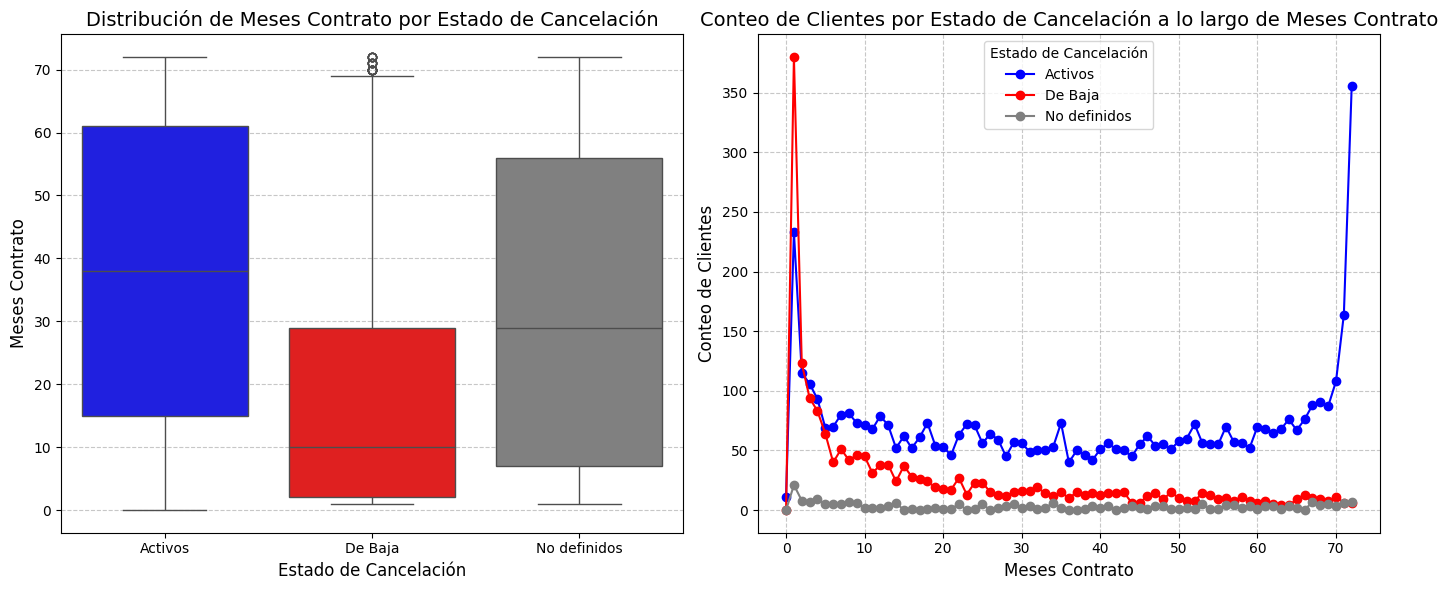

/tmp/ipython-input-210603308.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




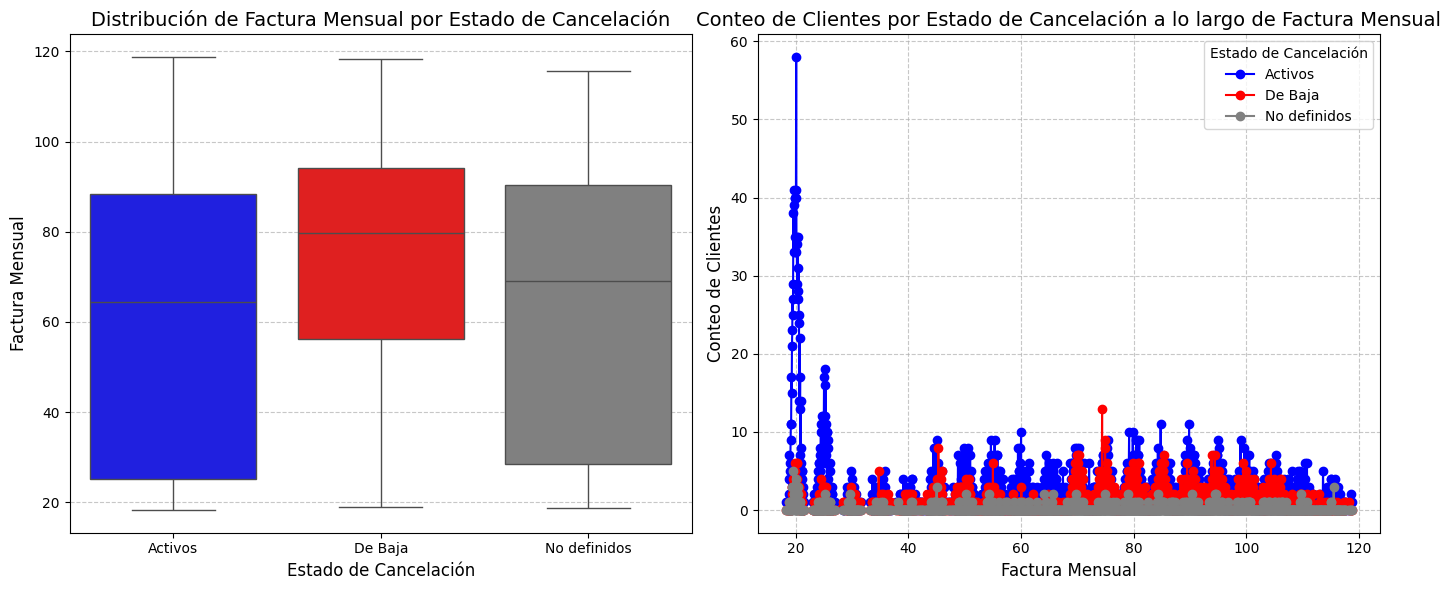

/tmp/ipython-input-210603308.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




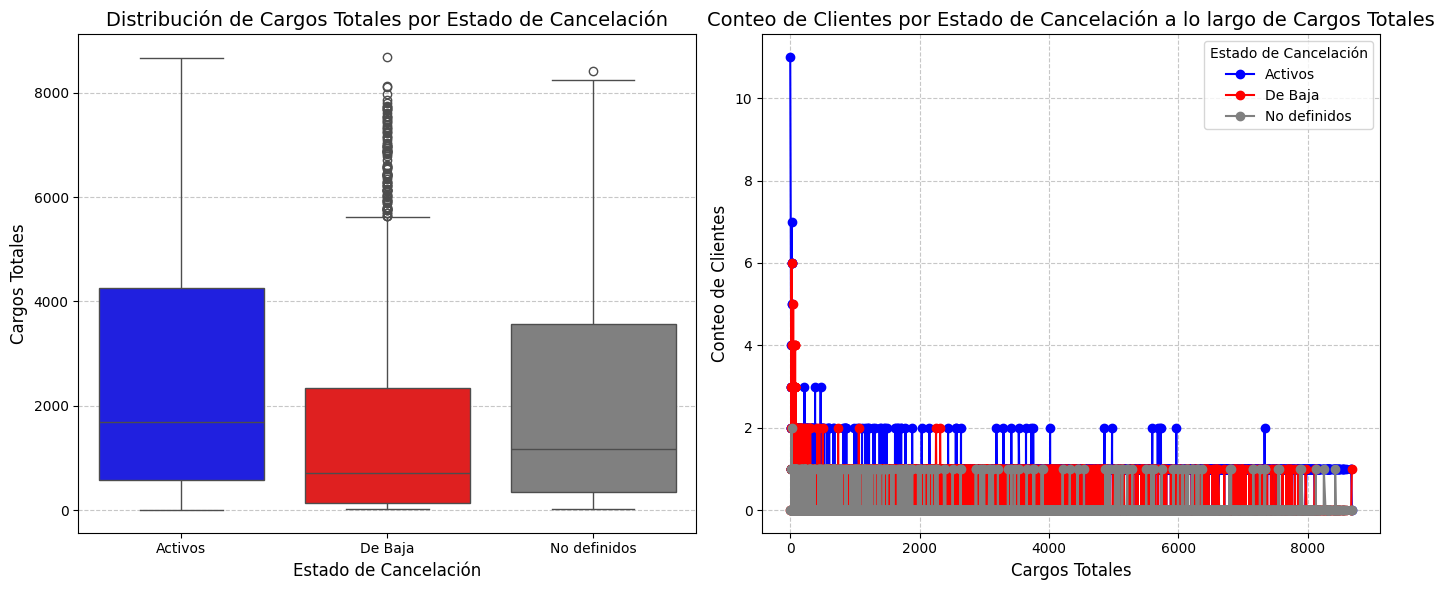

/tmp/ipython-input-210603308.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




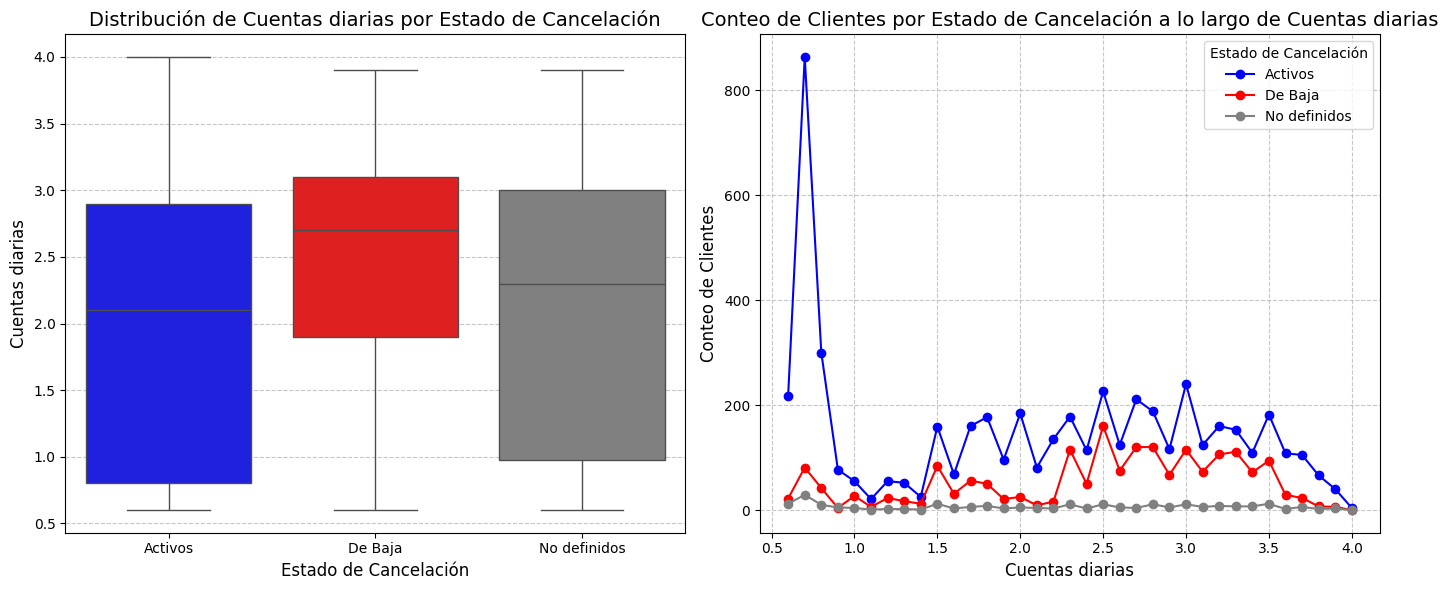

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_numerical_churn_analysis(df, numerical_column):
    """
    Genera un gráfico con dos subplots: un boxplot de una columna numérica vs. cancelación,
    y un gráfico de líneas mostrando el conteo de cada estado de cancelación a lo largo
    de los valores de la columna numérica.

    Args:
        df (pd.DataFrame): DataFrame de entrada con los datos de clientes.
        numerical_column (str): Nombre de la columna numérica a analizar.
    """
    # Validar si la columna numérica existe
    if numerical_column not in df.columns:
        print(f"Error: La columna '{numerical_column}' no existe en el DataFrame.")
        return

    # Asegurarse de que la columna de cancelación tenga las etiquetas de texto para el eje X y color
    cancellation_map = {-1: 'No definidos', 0: 'Activos', 1: 'De Baja'}
    # Crear una columna temporal con las etiquetas de texto si no existe
    churn_text_column_name = 'Cancelacion_Text'
    if churn_text_column_name not in df.columns:
         df[churn_text_column_name] = df['Cancelacion'].map(cancellation_map)


    # Crear una figura con dos subplots (1 fila, 2 columnas)
    fig, axs = plt.subplots(1, 2, figsize=(14, 6)) # Tamaño de figura aumentado

    # Definir la paleta de colores para los gráficos
    plot_colors = {'Activos': 'blue', 'De Baja': 'red', 'No definidos': 'gray'}


    # --- Primer Subplot: Box plot de Columna_Numérica vs. Cancelacion ---
    sns.boxplot(x=churn_text_column_name, y=numerical_column, data=df, ax=axs[0], order=['Activos', 'De Baja', 'No definidos'], palette=plot_colors)
    axs[0].set_title(f'Distribución de {numerical_column.replace("_", " ")} por Estado de Cancelación', fontsize=14)
    axs[0].set_xlabel('Estado de Cancelación', fontsize=12)
    axs[0].set_ylabel(numerical_column.replace("_", " "), fontsize=12)
    axs[0].grid(axis='y', linestyle='--', alpha=0.7) # Añadir líneas de cuadrícula para mejor legibilidad


    # --- Segundo Subplot: Conteo de cada Estado de Cancelación a lo largo de Columna_Numérica (Gráfico de Líneas) ---
    # Calcular el conteo de cada estado de cancelación para cada valor único en la columna numérica
    # Agrupar por la columna numérica y Cancelacion_Text, luego contar las ocurrencias
    # Usar unstack y fill_value(0) para manejar casos donde un estado podría no aparecer para un valor específico
    cancellation_counts_by_numerical = df.groupby([numerical_column, churn_text_column_name]).size().unstack(fill_value=0).reset_index()

    # Graficar los conteos a lo largo de la columna numérica
    # Graficar cada estado de cancelación como una línea separada usando los colores definidos
    for status, color in plot_colors.items():
        if status in cancellation_counts_by_numerical.columns:
            axs[1].plot(cancellation_counts_by_numerical[numerical_column], cancellation_counts_by_numerical[status],
                        label=status, marker='o', linestyle='-', color=color)


    axs[1].set_title(f'Conteo de Clientes por Estado de Cancelación a lo largo de {numerical_column.replace("_", " ")}', fontsize=14)
    axs[1].set_xlabel(numerical_column.replace("_", " "), fontsize=12)
    axs[1].set_ylabel('Conteo de Clientes', fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.7) # Añadir cuadrícula
    axs[1].legend(title='Estado de Cancelación') # Añadir una leyenda para distinguir las líneas

    # Ajustar layout para prevenir superposición
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

# Ahora llamar la función para cada columna numérica deseada
numerical_cols_to_plot = ['Meses_Contrato', 'Factura_Mensual', 'Cargos_Totales', 'Cuentas_diarias']

for col in numerical_cols_to_plot:
    plot_numerical_churn_analysis(df_telecomx_normalized, col)

##Análisis de correlación entre variables

Crear una nueva columna en el DataFrame `df_telecomx_normalized` llamada 'Numero_Servicios' que represente la cantidad de servicios adicionales contratados por cada cliente. Estos servicios adicionales incluyen 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas', 'Suscripcion_Seguridad_En_Linea', 'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_Técnico', 'Suscripcion_TV_Streaming', y 'Suscripcion_Películas_Streaming'. Se deben contar solo los servicios donde el valor es 1 (indicando suscripción 'Yes').


In [96]:
# Define una lista de nombres de columnas que representan los servicios adicionales
service_columns = [
    'Suscripcion_Servicio_Telefono',
    'Suscripcion_Multiples_Lineas',
    'Suscripcion_Seguridad_En_Linea',
    'Suscripcion_Respaldo_En_Linea',
    'Suscripcion_Proteccion_Dispositivo',
    'Suscripcion_Soporte_Técnico',
    'Suscripcion_TV_Streaming',
    'Suscripcion_Películas_Streaming'
]

# Crear la columna 'Numero_Servicios' sumando los valores en las columnas de servicio (solo donde el valor es 1)
# Podemos sumar directamente las columnas ya que están codificadas como 0, 1 o -1.
# Sumar contará los '1', y podemos manejar los '-1' más tarde si es necesario, pero para contar los servicios 'contratados', 1 es el valor relevante.
df_telecomx_normalized['Numero_Servicios'] = df_telecomx_normalized[service_columns].apply(lambda row: (row == 1).sum(), axis=1)

# Mostrar las primeras filas del DataFrame incluyendo la nueva columna 'Numero_Servicios'
display(df_telecomx_normalized[['ID_Cliente'] + service_columns + ['Numero_Servicios']].head())

,ID_Cliente,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Numero_Servicios
0,0002-ORFBO,1,0,0,1,0,1,1,0,4
1,0003-MKNFE,1,1,0,0,0,0,0,1,3
2,0004-TLHLJ,1,0,0,0,1,0,0,0,2
3,0011-IGKFF,1,0,0,1,1,0,1,1,5
4,0013-EXCHZ,1,0,0,0,0,1,1,0,3


Calcular la matriz de correlación entre todas las variables numéricas en el DataFrame `df_telecomx_normalized`, incluyendo la nueva columna 'Numero_Servicios' y la columna 'Cancelacion'.

In [97]:
# Seleccionar solo columnas numéricas
numerical_df = df_telecomx_normalized.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación
display(correlation_matrix)

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Factura_Electronica,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Numero_Servicios
Cancelacion,1.000000,0.129071,-0.137711,-0.147291,-0.307073,0.014353,0.033953,0.026225,0.069297,0.081239,0.029384,0.149081,0.147698,0.163576,0.173298,-0.171432,0.172484,-0.054040
Adulto_Mayor,0.129071,1.000000,0.022970,-0.212952,0.018187,0.010060,0.115623,0.082444,0.146275,0.140955,0.068386,0.166059,0.175919,0.157734,0.220388,0.104076,0.220128,0.097072
Tiene_Pareja,-0.137711,0.022970,1.000000,0.448900,0.377551,0.018828,0.117067,0.090215,0.089499,0.098300,0.074163,0.079868,0.074049,-0.011201,0.097122,0.315409,0.097215,0.217196
Tiene_Dependientes,-0.147291,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.023195,-0.029402,-0.064207,-0.070022,-0.042790,-0.087142,-0.103102,-0.111752,-0.115832,0.061474,-0.116037,0.020755
Meses_Contrato,-0.307073,0.018187,0.377551,0.159892,1.000000,0.010205,0.259340,0.231001,0.253037,0.253381,0.227794,0.200411,0.204225,0.007949,0.247982,0.825407,0.247966,0.523853
Suscripcion_Servicio_Telefono,0.014353,0.010060,0.018828,-0.003863,0.010205,1.000000,0.675964,-0.160843,-0.130208,-0.143747,-0.163279,-0.110570,-0.116135,0.013624,0.246709,0.113985,0.248399,0.125988
Suscripcion_Multiples_Lineas,0.033953,0.115623,0.117067,-0.023195,0.259340,0.675964,1.000000,0.068373,0.131296,0.123694,0.066823,0.163714,0.161845,0.131590,0.490385,0.412122,0.490556,0.471508
Suscripcion_Seguridad_En_Linea,0.026225,0.082444,0.090215,-0.029402,0.231001,-0.160843,0.068373,1.000000,0.706885,0.702443,0.736278,0.663421,0.668783,0.188463,0.637022,0.483112,0.635491,0.653647
Suscripcion_Respaldo_En_Linea,0.069297,0.146275,0.089499,-0.064207,0.253037,-0.130208,0.131296,0.706885,1.000000,0.713219,0.709105,0.704216,0.701708,0.265546,0.711359,0.538664,0.709785,0.691606
Suscripcion_Proteccion_Dispositivo,0.081239,0.140955,0.098300,-0.070022,0.253381,-0.143747,0.123694,0.702443,0.713219,1.000000,0.725487,0.750166,0.753714,0.249061,0.738000,0.546512,0.736733,0.729579


Generar un mapa de calor (heatmap) de la matriz de correlación calculada en el paso anterior (`correlation_matrix`) para visualizar las relaciones entre las variables numéricas.


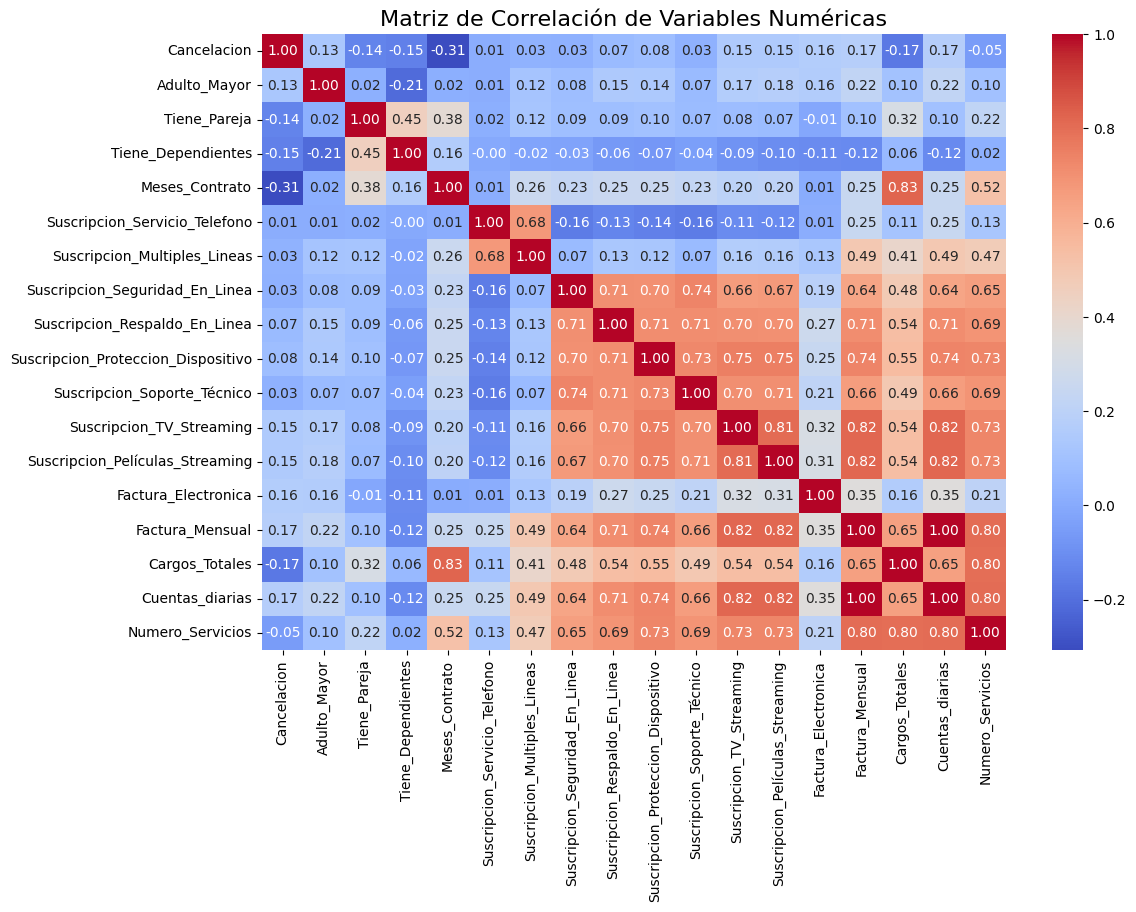

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir un título al mapa de calor
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)

# Mostrar el gráfico
plt.show()

# 📄 Informe Final – Análisis de Evasión de Clientes de Telecom X

## Introducción
Este análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (**Churn**) en **Telecom X**.  
La empresa enfrenta una alta tasa de cancelaciones, y mediante este estudio se busca identificar patrones y comportamientos clave que permitan desarrollar estrategias efectivas de retención.

## Limpieza y Tratamiento de Datos
Se realizó el proceso de importación y exploración inicial de los datos provenientes de la API de Telecom X.  
Las principales acciones fueron:
- **Revisión del dataset:** tipos de datos, estructura y descripción estadística.
- **Detección de inconsistencias:** valores nulos, duplicados y categorías anómalas.
- **Corrección y estandarización:** normalización de texto, conversión de valores categóricos a formato binario (Sí/No → 1/0).
- **Creación de nuevas variables:** se calculó la columna `Cuentas_Diarias` a partir de la facturación mensual para obtener un valor más granular.

## Análisis Exploratorio de Datos (EDA)
1. **Análisis descriptivo:** se calcularon métricas como media, mediana, desviación estándar y distribuciones para las variables relevantes.
2. **Distribución de evasión:** se evaluó la proporción de clientes que permanecieron vs. los que cancelaron el servicio.
3. **Evasión por variables categóricas:** se analizaron factores como género, tipo de contrato y método de pago, identificando segmentos con mayor probabilidad de evasión.
4. **Evasión por variables numéricas:** se estudió la relación entre métricas como `TotalCharges` y `tenure` con la probabilidad de cancelación.

## Correlación de Variables (Extra)

Se exploró la correlación entre variables numéricas con el objetivo de detectar patrones útiles para la construcción de modelos predictivos. **Principales hallazgos:**
- **Meses_Contrato** y **Cargos_Totales** presentan una **alta correlación positiva**, lo que indica que clientes con más tiempo en la compañía acumulan mayores gastos totales.
- **Cantidad_Servicios** muestra **correlación negativa con Churn**, sugiriendo que quienes contratan más servicios tienen menor probabilidad de cancelar.
- **Cuenta_Diaria** se encuentra relacionada con otros indicadores de gasto, reforzando su relevancia en el análisis del comportamiento del cliente.

Este análisis confirma que un mayor compromiso del cliente —ya sea en tiempo de permanencia o en cantidad de servicios contratados— está asociado con **menor riesgo de cancelación**.

## Conclusiones e Insights
- **Duración del contrato:** clientes con contratos mensuales muestran mayor tendencia a cancelar el servicio.
- **Método de pago:** el uso de pagos electrónicos mensuales se asocia con una tasa de evasión más alta.
- **Gasto mensual:** clientes con facturas más altas tienden a cancelar más, posiblemente por insatisfacción con el valor percibido.
- **Antigüedad del cliente:** a menor tiempo en la compañía, mayor probabilidad de churn.

## Recomendaciones
- Incentivar contratos a largo plazo con descuentos o beneficios adicionales.
- Ofrecer planes personalizados y promociones para clientes con alto gasto mensual.
- Implementar programas de fidelización para nuevos clientes durante sus primeros meses.
- Revisar y optimizar la experiencia de pago electrónico, ya que presenta una alta correlación con la evasión.
